In [2]:
import numpy as np
import pandas as pd
# import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Cleared_output.csv")
df.head(10)

,Ship,Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second,Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2.0,0.00,41.9136
1,Second,Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3.0,0.00,219.5820
2,Second,Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2.0,NaN,NaN
3,Standard,Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5.0,0.45,NaN
4,Standard,Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2.0,NaN,NaN
5,Standard,Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7.0,0.00,NaN
6,Standard,Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4.0,NaN,NaN
7,Standard,Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6.0,0.20,NaN
8,Standard,Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3.0,NaN,NaN
9,Standard,Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5.0,NaN,NaN


DATA CLENAING

In [3]:
df.shape

(9994, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship          9994 non-null   object 
 1   Mode          9994 non-null   object 
 2   Segment       9994 non-null   object 
 3   Country       9994 non-null   object 
 4   City          9994 non-null   object 
 5   State         9994 non-null   object 
 6   Postal Code   9994 non-null   int64  
 7   Region        9994 non-null   object 
 8   Category      9994 non-null   object 
 9   Sub-Category  9903 non-null   object 
 10  Sales         9994 non-null   float64
 11  Quantity      8771 non-null   float64
 12  Discount      6433 non-null   float64
 13  Profit        2008 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 1.1+ MB


In [5]:
# df.isnull()
df.isnull().sum()

Ship               0
Mode               0
Segment            0
Country            0
City               0
State              0
Postal Code        0
Region             0
Category           0
Sub-Category      91
Sales              0
Quantity        1223
Discount        3561
Profit          7986
dtype: int64

In [6]:
# df.shape
df.dropna(inplace=True)
df.shape

(1917, 14)

In [7]:
df["Sales"] = df["Sales"].astype("int")


In [8]:
df["Sales"].dtypes

dtype('int32')

In [9]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000
mean,56773.429317,377.633281,3.796035,0.186818,32.635239
std,28087.148309,805.039706,2.215109,0.180542,361.234991
min,1752.000000,1.000000,1.000000,0.000000,-6599.978000
25%,33142.000000,55.000000,2.000000,0.000000,-7.439400
50%,60025.000000,161.000000,3.000000,0.200000,10.393600
75%,80020.000000,422.000000,5.000000,0.300000,45.369600
max,99301.000000,17499.000000,14.000000,0.700000,8399.976000


In [10]:
df.head(10)

,Ship,Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second,Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261,2.0,0.0,41.9136
1,Second,Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731,3.0,0.0,219.5820
23,Second,Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71,2.0,0.3,-1.0196
24,Standard,Class,Consumer,United States,Orem,Utah,84057,West,Furniture,Tables,1044,3.0,0.0,240.2649
27,Standard,Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083,7.0,0.5,-1665.0522
29,Standard,Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Furnishings,124,3.0,0.2,15.5250
35,First,Class,Corporate,United States,Richardson,Texas,75080,Central,Technology,Phones,1097,7.0,0.2,123.4737
36,First,Class,Corporate,United States,Richardson,Texas,75080,Central,Furniture,Furnishings,190,5.0,0.6,-147.9630
41,Standard,Class,Corporate,United States,Naperville,Illinois,60540,Central,Technology,Phones,147,4.0,0.2,16.5564
44,First,Class,Corporate,United States,Eagan,Minnesota,55122,Central,Technology,Accessories,45,2.0,0.0,19.7714


DATA ANALYSIS (EDA)

1. Ship - Sales, Quantity & Profit:

- Most sales, Quantity and profit is from Standard Ship (i.e almost 2.6 times more than other)

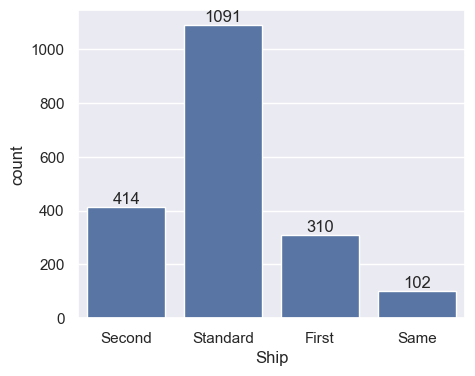

<Figure size 600x600 with 0 Axes>

In [54]:
plot_ship = sns.countplot(x = "Ship", data=df)

plt.figure(figsize=(6, 6))
for bar in plot_ship.containers:
    plot_ship.bar_label(bar)

<Axes: xlabel='Ship', ylabel='Sales'>

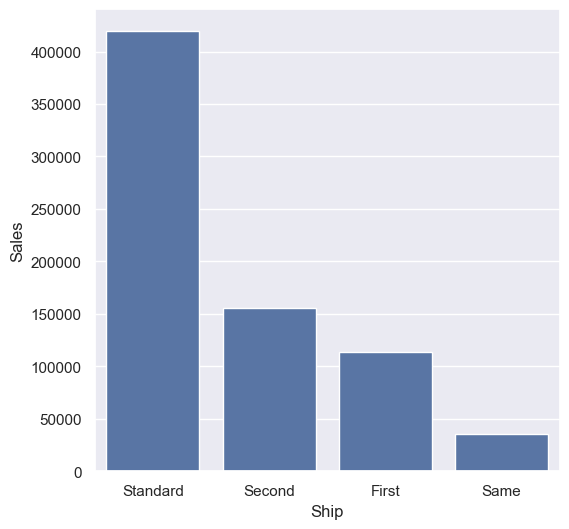

In [55]:
plot_ship_1 = df.groupby(["Ship"], as_index = False)["Sales"].sum().sort_values(by = "Sales", ascending = False).head(10)

plt.figure(figsize=(6, 6))
sns.barplot(x = "Ship", y = "Sales", data = plot_ship_1)

<Axes: xlabel='Ship', ylabel='Quantity'>

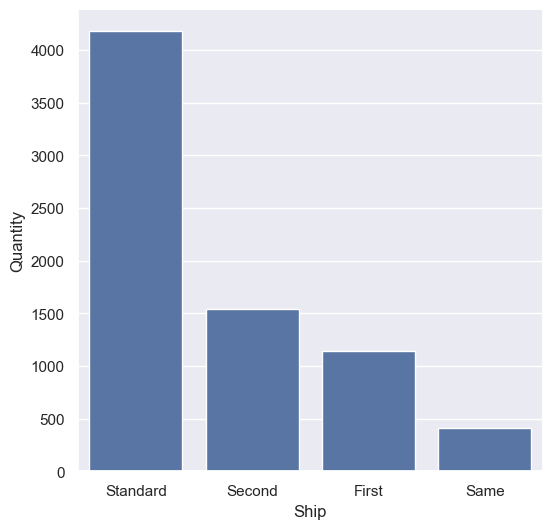

In [56]:
plot_ship_1 = df.groupby(["Ship"], as_index = False)["Quantity"].sum().sort_values(by = "Quantity", ascending = False).head(10)

plt.figure(figsize=(6, 6))
sns.barplot(x = "Ship", y = "Quantity", data = plot_ship_1)

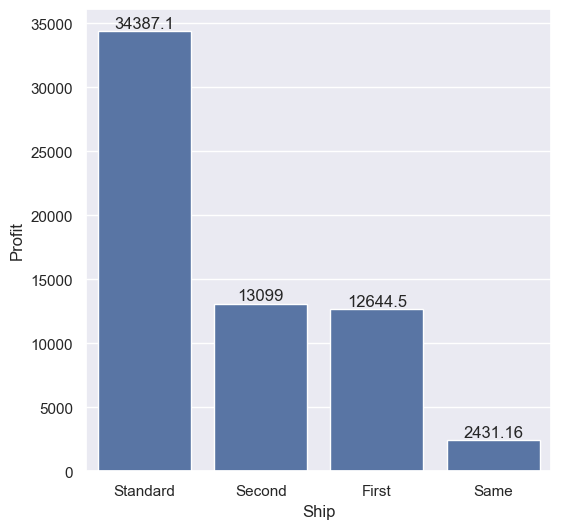

In [57]:
plot_ship_1 = df.groupby(["Ship"], as_index = False)["Profit"].sum().sort_values(by = "Profit", ascending = False).head(10)

plt.figure(figsize=(6, 6))
x = sns.barplot(x = "Ship", y = "Profit", data = plot_ship_1)

for bar in x.containers:
    x.bar_label(bar)



2. Segment - Sales, Quantity & Profit:

- Most sales, Quantity and profit is from Customer(i.e almost 1.6 times more than corporate in sales and Quantity but 1.08 times in profit)

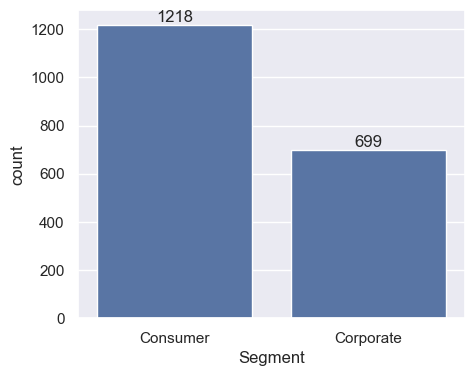

<Figure size 600x600 with 0 Axes>

In [58]:
plot_segment = sns.countplot(x = "Segment", data=df)

plt.figure(figsize=(6, 6))
for bar in plot_segment.containers:
    plot_segment.bar_label(bar)

<Axes: xlabel='Segment', ylabel='Sales'>

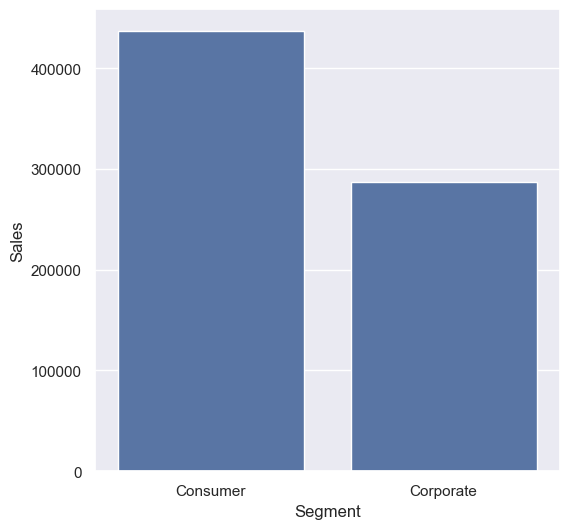

In [59]:
plot_segment_1 = df.groupby(["Segment"], as_index = False)["Sales"].sum().sort_values(by = "Sales", ascending = False).head(10)

plt.figure(figsize=(6, 6))
sns.barplot(x = "Segment", y = "Sales", data = plot_segment_1)

<Axes: xlabel='Segment', ylabel='Quantity'>

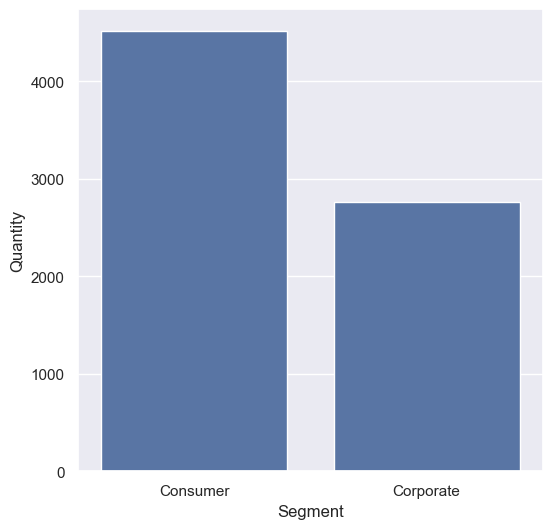

In [60]:
plot_segment_2 = df.groupby(["Segment"], as_index = False)["Quantity"].sum().sort_values(by = "Quantity", ascending = False).head(10)

plt.figure(figsize=(6, 6))
sns.barplot(x = "Segment", y = "Quantity", data = plot_segment_2)

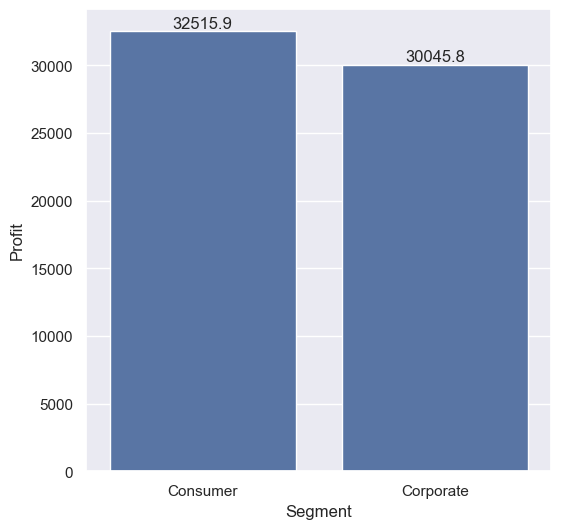

In [61]:
plot_segment_3 = df.groupby(["Segment"], as_index = False)["Profit"].sum().sort_values(by = "Profit", ascending = False).head(10)

plt.figure(figsize=(6, 6))
x = sns.barplot(x = "Segment", y = "Profit", data = plot_segment_3)

for bar in x.containers:
    x.bar_label(bar)


3. State - Sales, Quantity & Profit:

- Most sales and Quantity is from Standard Ship(i.e almost 1.1 times more than second in Quantity and sale)
- Most profit is from "Washington"(~14.77% of the total profit) and Most loss is from "Ohio"(27.97% of the total loss)
- Total Profit: 119548  Total loss: 56987

<Axes: xlabel='State', ylabel='Sales'>

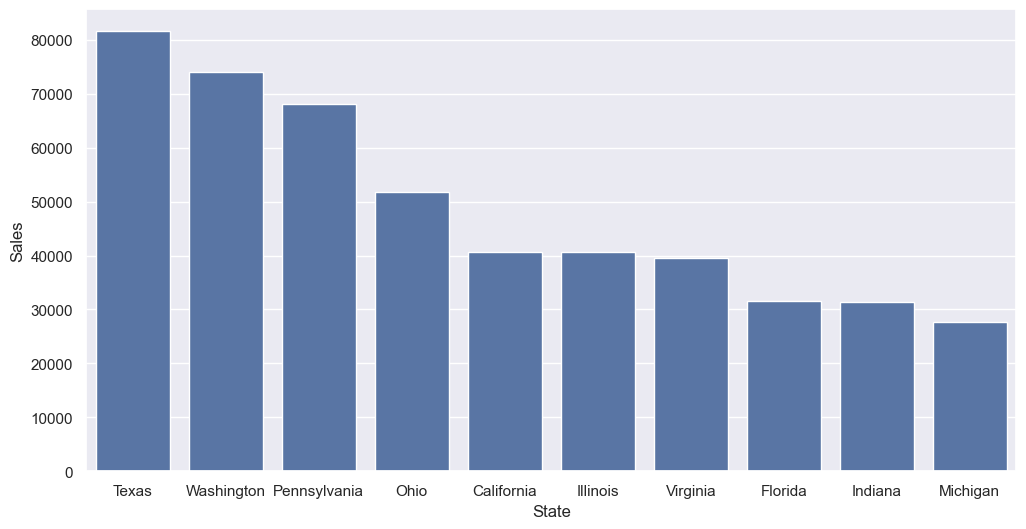

In [62]:
plot_state = df.groupby(["State"], as_index = False)["Sales"].sum().sort_values(by = "Sales", ascending = False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x = "State", y = "Sales", data = plot_state)

<Axes: xlabel='State', ylabel='Quantity'>

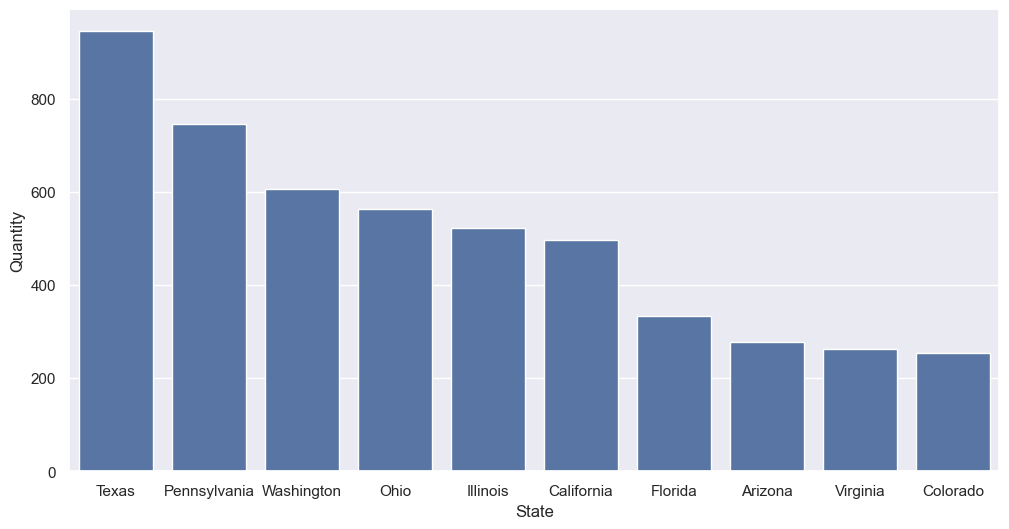

In [63]:
plot_state_1 = df.groupby(["State"], as_index = False)["Quantity"].sum().sort_values(by = "Quantity", ascending = False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x = "State", y = "Quantity", data = plot_state_1)

<Axes: xlabel='State', ylabel='Profit'>

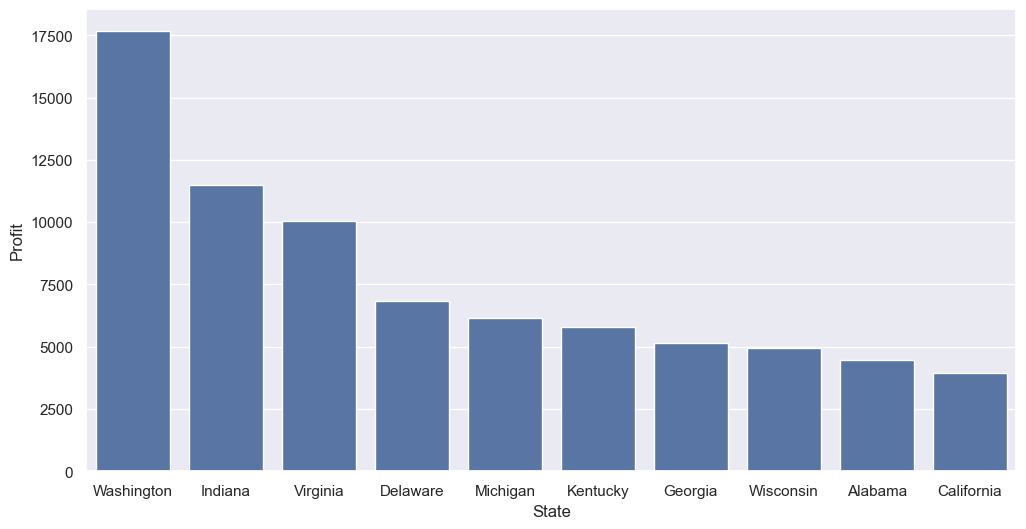

In [64]:
plot_state_2 = df.groupby(["State"], as_index = False)["Profit"].sum().sort_values(by = "Profit", ascending = False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x = "State", y = "Profit", data = plot_state_2)


4. Category - Sales, Quantity & Profit:

- Most sales is from technology(i.e almost 1.006 times more than furniture)
- Most Quantity is from furniture(i.e almost 1.15 times more than technology)
- Most profit is from technology(i.e almost 8.2 times more than furniture), no net loss

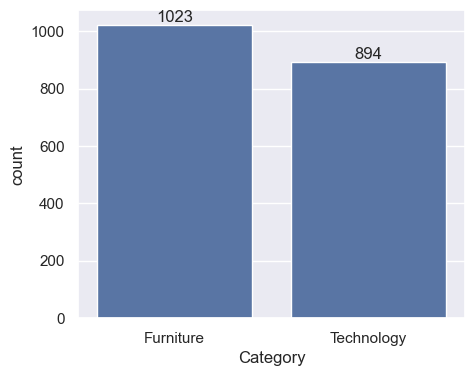

<Figure size 600x600 with 0 Axes>

In [65]:
plot_category = sns.countplot(x = "Category", data=df)

plt.figure(figsize=(6, 6))
for bar in plot_category.containers:
    plot_category.bar_label(bar)

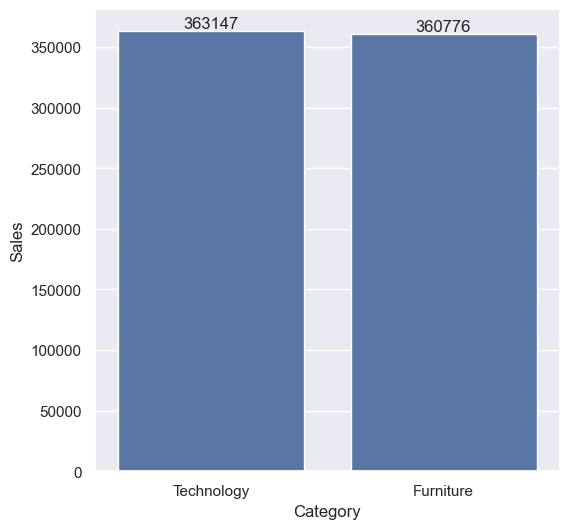

In [68]:
plot_category_1 = df.groupby(["Category"], as_index = False)["Sales"].sum().sort_values(by = "Sales", ascending = False)

plt.figure(figsize=(6, 6))
x = sns.barplot(x = "Category", y = "Sales", data = plot_category_1)

for bar in x.containers:
    x.bar_label(bar)

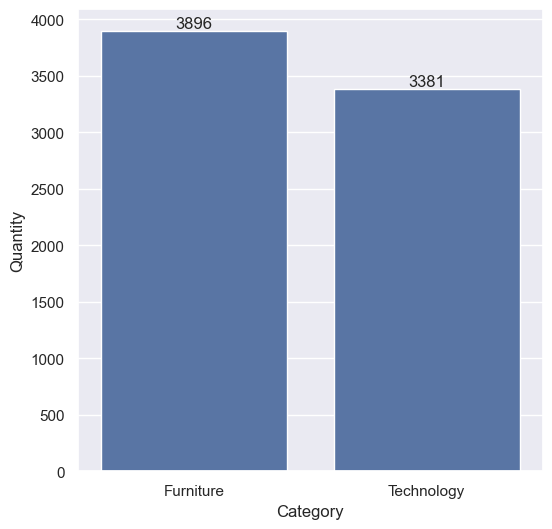

In [69]:
plot_category_2 = df.groupby(["Category"], as_index = False)["Quantity"].sum().sort_values(by = "Quantity", ascending = False)

plt.figure(figsize=(6, 6))
x1 = sns.barplot(x = "Category", y = "Quantity", data = plot_category_2)

for bar in x1.containers:
    x1.bar_label(bar)

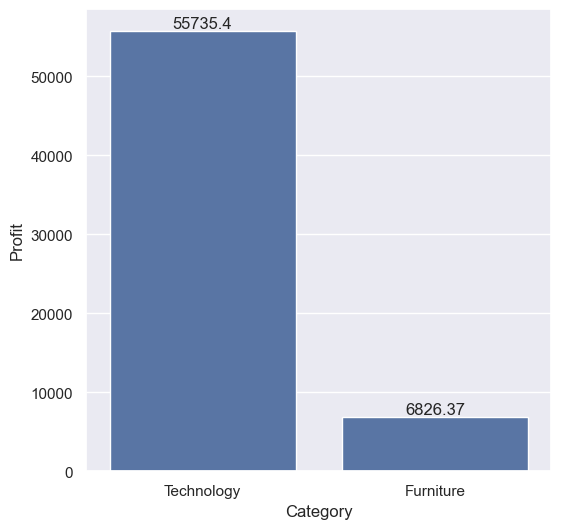

In [70]:
plot_category_3 = df.groupby(["Category"], as_index = False)["Profit"].sum().sort_values(by = "Profit", ascending = False)

plt.figure(figsize=(6, 6))
x2 = sns.barplot(x = "Category", y = "Profit", data = plot_category_3)

for bar in x2.containers:
    x2.bar_label(bar)

<Axes: xlabel='Category', ylabel='Discount'>

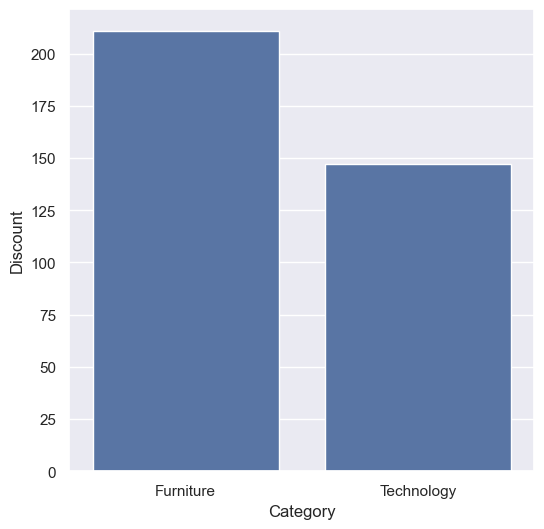

In [71]:
plot_category_4 = df.groupby(["Category"], as_index = False)["Discount"].sum().sort_values(by = "Discount", ascending = False)

plt.figure(figsize=(6, 6))
sns.barplot(x = "Category", y = "Discount", data = plot_category_4)


5. Sub-Category - Sales, Quantity & Profit:

- Most sales is from furnishings(i.e almost 23.4% of total)
- Most Quantity is from Chairs(i.e almost 22.9% of total)
- Most profit is from Copiers(i.e 40.22% of total), Most loss is from Machines(i.e. 49.48% of total)

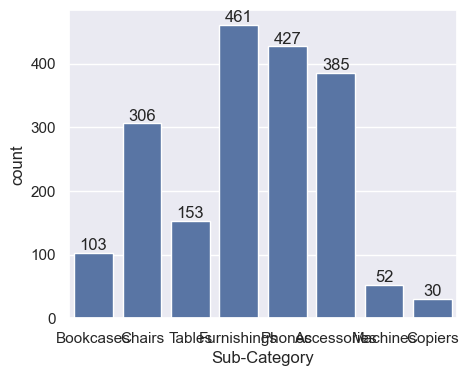

<Figure size 1600x600 with 0 Axes>

In [78]:
plot_sub_category = sns.countplot(x = "Sub-Category", data=df)

plt.figure(figsize=(16, 6))
for bar in plot_sub_category.containers:
    plot_sub_category.bar_label(bar)

<Axes: xlabel='Sub-Category', ylabel='Sales'>

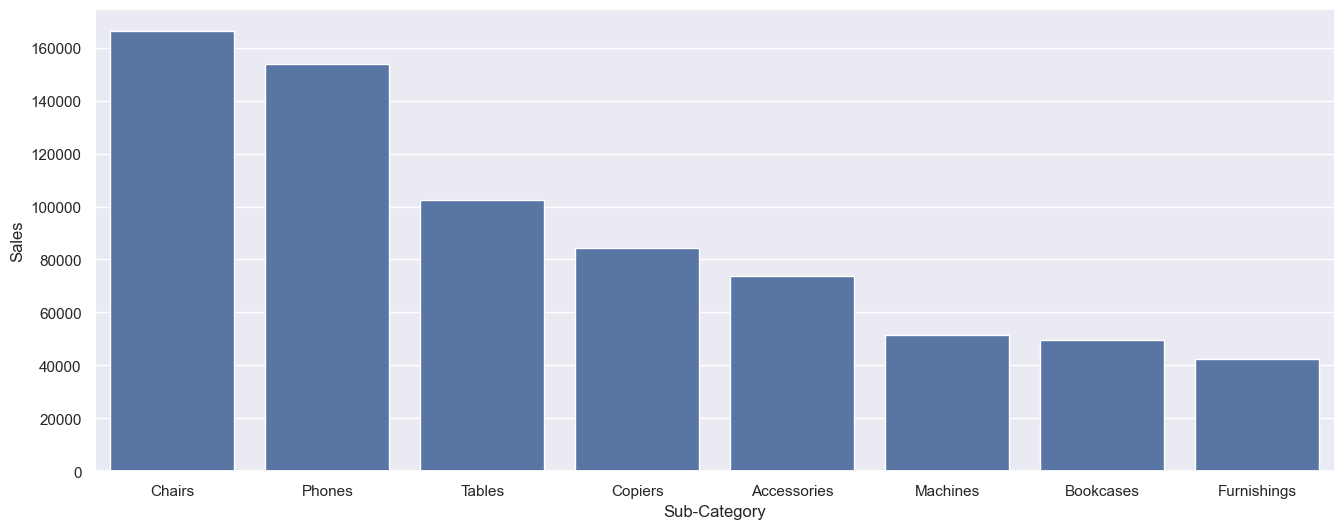

In [77]:
plot_sub_category_1 = df.groupby(["Sub-Category"], as_index = False)["Sales"].sum().sort_values(by = "Sales", ascending = False)

plt.figure(figsize=(16, 6))
sns.barplot(x = "Sub-Category", y = "Sales", data = plot_sub_category_1)

<Axes: xlabel='Sub-Category', ylabel='Quantity'>

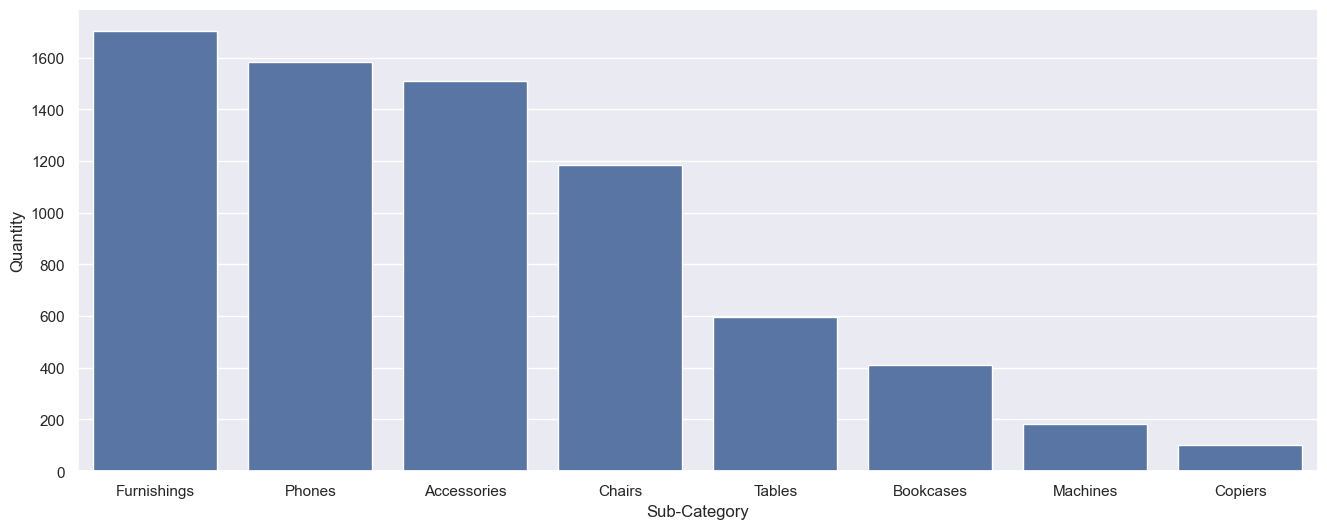

In [79]:
plot_sub_category_2 = df.groupby(["Sub-Category"], as_index = False)["Quantity"].sum().sort_values(by = "Quantity", ascending = False)

plt.figure(figsize=(16, 6))
sns.barplot(x = "Sub-Category", y = "Quantity", data = plot_sub_category_2)

<Axes: xlabel='Sub-Category', ylabel='Profit'>

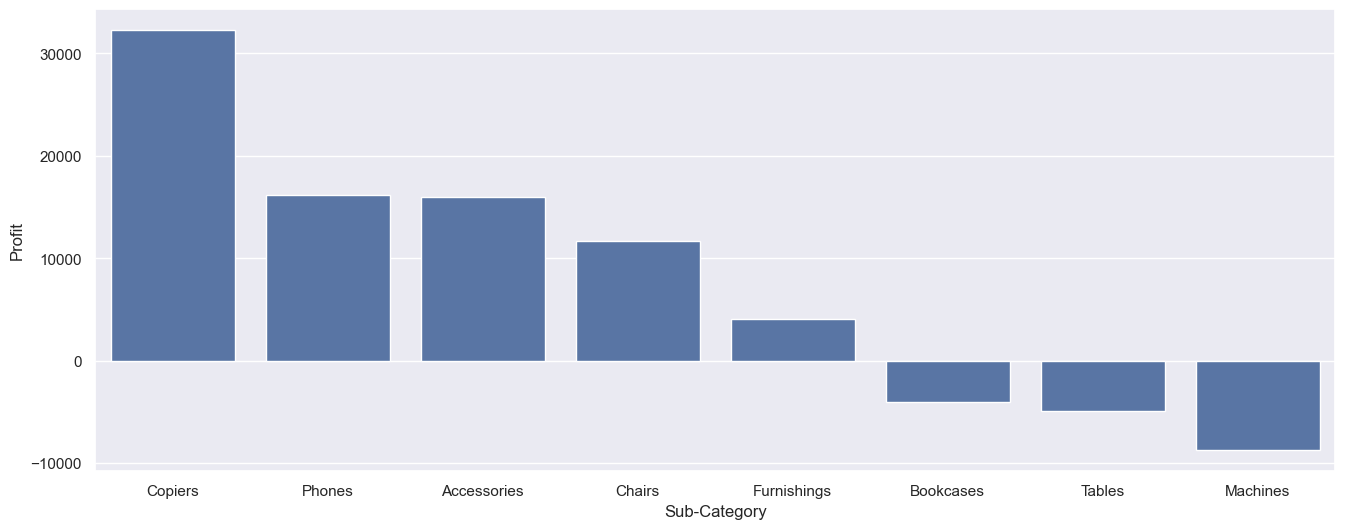

In [80]:
plot_sub_category_3 = df.groupby(["Sub-Category"], as_index = False)["Profit"].sum().sort_values(by = "Profit", ascending = False)

plt.figure(figsize=(16, 6))
sns.barplot(x = "Sub-Category", y = "Profit", data = plot_sub_category_3)

<Axes: xlabel='Sub-Category', ylabel='Discount'>

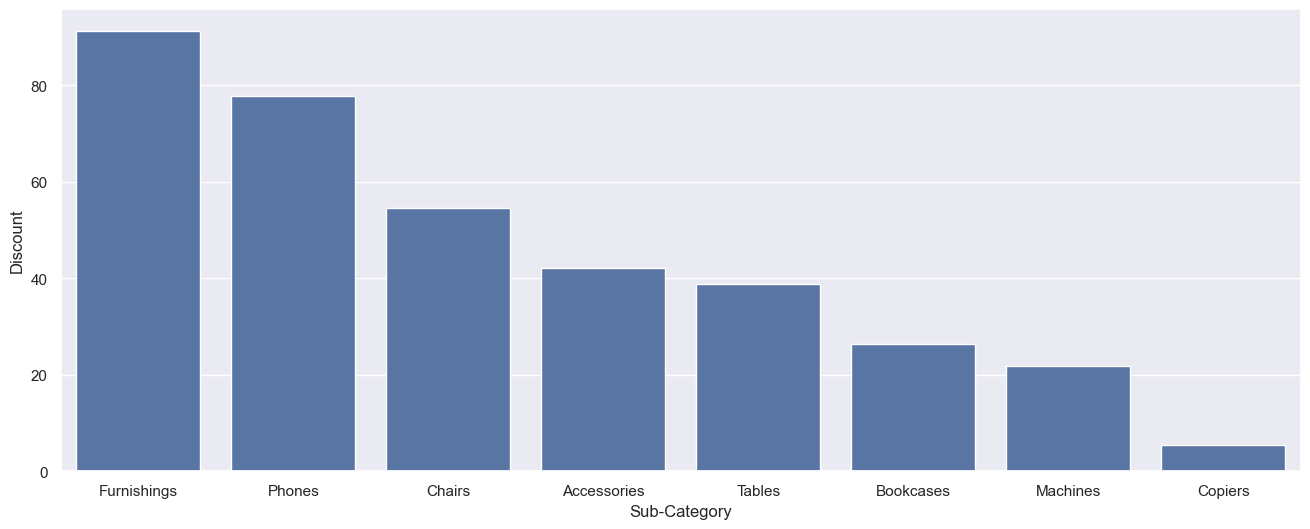

In [81]:
plot_sub_category_4 = df.groupby(["Sub-Category"], as_index = False)["Discount"].sum().sort_values(by = "Discount", ascending = False)

plt.figure(figsize=(16, 6))
sns.barplot(x = "Sub-Category", y = "Discount", data = plot_sub_category_4)


CONCLUSION:

- In Ship section, Most sales, Quantity and profit is from Standard Ship.
	i.e almost 2.6 times more than second.
- In Segment section, Most sales, Quantity and profit is from Customer.
	i.e almost 1.6 times more than corporate in sales and Quantity but 1.08 times in profit.
 
- In State section, Most sales and Quantity is from Standard Ship(i.e almost 1.1 times more than second in Quantity and sale).
	Most profit is from "Washington"(~14.77% of the total profit) and Most loss is from "Ohio"(27.97% of the total loss).
	Total Profit: 119548  Total loss: 56987

- In Category section, Most sales is from technology(i.e almost 1.006 times more than furniture).
	Most Quantity is from furniture(i.e almost 1.15 times more than technology).
	Most profit is from technology(i.e almost 8.2 times more than furniture), no net loss.

- In Sub-Category section, Most sales is from furnishings(i.e almost 23.4% of total).
	Most Quantity is from Chairs(i.e almost 22.9% of total).
	Most profit is from Copiers(i.e 40.22% of total), Most loss is from Machines(i.e. 49.48% of total).